



Q1. If the initial and final states are as below and H(n): number of misplaced tiles in the current state n as compared to the goal node need to be considered as the heuristic function. You need to use **Best First Search algorithm.**

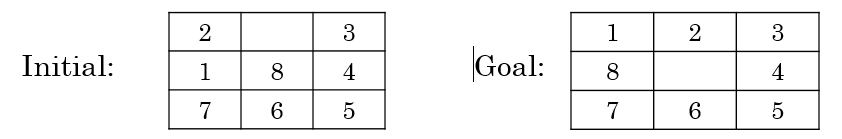

In [ ]:
import sys
import copy

q = []
visited = []

def compare(s,g):
    if s==g:
        return(1)
    else:
        return(0)

def find_pos(s):

    for i in range(3):
        for j in range(3):
            if s[i][j] == 0:
                return([i,j])


def up(s,pos):

    i = pos[0]
    j = pos[1]

    if i > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i-1][j]
        temp[i-1][j] = 0
        return (temp)
    else:
        return (s)


def down(s,pos):

    i = pos[0]
    j = pos[1]

    if i < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i+1][j]
        temp[i+1][j] = 0
        return (temp)
    else:
        return (s)


def right(s,pos):

    i = pos[0]
    j = pos[1]

    if j < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j+1]
        temp[i][j+1] = 0
        return (temp)
    else:
        return (s)


def left(s,pos):

    i = pos[0]
    j = pos[1]

    if j > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j-1]
        temp[i][j-1] = 0
        return (temp)
    else:
        return (s)

def enqueue(s,val):
    global q
    q = q + [(val,s)]

def heuristic(s,g):
    d = 0
    for i in range(3):
        for j in range(3):
            if s[i][j] != g[i][j]:
                d += 1
    return d


def dequeue():

    global q
    global visited

    q.sort()
    visited = visited + [q[0][1]]

    elem = q[0][1]
    del q[0]
    return (elem)

def search(s,g):

    curr_state = copy.deepcopy(s)
    if s == g:
        return

    global visited
    while(1):

        pos = find_pos(curr_state)
        new = up(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic(new,g))


        new = down(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic(new,g))

        new = right(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic(new,g))

        new = left(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic(new,g))

        if len(q) > 0:
            curr_state = dequeue()
        else:
            print ("not found")
            return


def main():
    s = [[2,0,3],[1,8,4],[7,6,5]]
    g = [[1,2,3],[8,0,4],[7,6,5]]
    global q
    global visited
    q = q
    visited = visited + [s]

    search(s,g)

if __name__ == "__main__":
    main()


found!! The intermediate states are:
[[[2, 0, 3], [1, 8, 4], [7, 6, 5]], [[0, 2, 3], [1, 8, 4], [7, 6, 5]], [[1, 2, 3], [0, 8, 4], [7, 6, 5]], [[1, 2, 3], [8, 0, 4], [7, 6, 5]]]


Q2. If the initial and final states have been changed as below and approach you need to use is **Hill Climbing searching algorithm**. H(n): number of misplaced tiles in the current state n as compared to the goal node as the heuristic function for the following states.

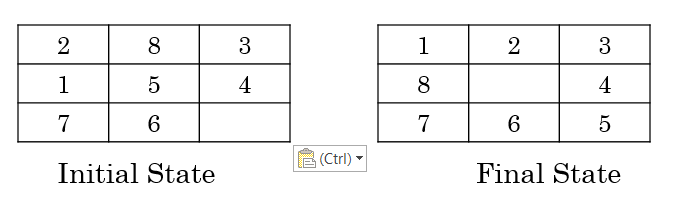

In [ ]:
import sys
import copy

curr_min = sys.maxsize
q = []
visited = []

def compare(s,g):
    if s==g:
        return(1)
    else:
        return(0)

def find_pos(s):

    for i in range(3):
        for j in range(3):
            if s[i][j] == 0:
                return([i,j])


def up(s,pos):

    i = pos[0]
    j = pos[1]

    if i > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i-1][j]
        temp[i-1][j] = 0
        return (temp)
    else:
        return (s)


def down(s,pos):

    i = pos[0]
    j = pos[1]

    if i < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i+1][j]
        temp[i+1][j] = 0
        return (temp)
    else:
        return (s)


def right(s,pos):

    i = pos[0]
    j = pos[1]

    if j < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j+1]
        temp[i][j+1] = 0
        return (temp)
    else:
        return (s)


def left(s,pos):

    i = pos[0]
    j = pos[1]

    if j > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j-1]
        temp[i][j-1] = 0
        return (temp)
    else:
        return (s)

def enqueue(s):
    global q
    q = q + [s]

def heuristic(s,g):
    d = 0
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] != g[i][j]:
                d += 1
    return d


def dequeue(g):

    h = []
    global q
    global visited
    global curr_min

    for i in range(len(q)):
        h = h + [heuristic(q[i],g)]

    if min(h) < curr_min:
        curr_min = min(h)
        index = h.index(min(h))
        visited = visited + [q[index]]
        elem = q[index]
        q = []
        return (elem)
    else:
        print ("optimal solution found !! The intermediate states are: ")
        print (visited)
        exit()




def search(s,g):

    curr_state = copy.deepcopy(s)
    if s == g:
        return

    global visited
    while(1):

        pos = find_pos(curr_state)
        new = up(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)


        new = down(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        new = right(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        new = left(curr_state,pos)

        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        if len(q) > 0:
            curr_state = dequeue(g)
        else:
            print ("not found")
            return


def main():
    s = [[2,8,3],[1,5,4],[7,6,0]]
    g = [[1,2,7],[8,0,5],[3,4,6]]
    global q
    global visited
    q = q + [s]
    visited = visited + [s]
    search(s,g)

if __name__ == "__main__":
    main()



optimal solution found !! The intermediate states are: 
[[[2, 8, 3], [1, 5, 4], [7, 6, 0]], [[2, 8, 3], [1, 5, 4], [7, 0, 6]], [[2, 8, 3], [1, 0, 4], [7, 5, 6]]]


TypeError: ignored

Q3. Apply A* searching algorithm by taking H(n): number of correctly placed tiles in the current state n as compared to the goal node. as the heuristic function.

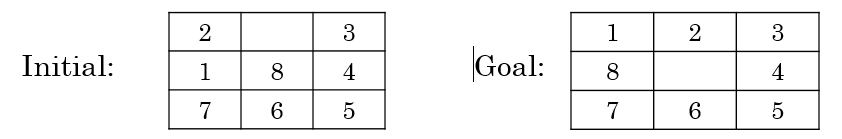

In [ ]:
import sys
import copy

q = []
visited = []

def compare(s,g):
    if s==g:
        return(1)
    else:
        return(0)

def find_pos(s):

    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] == 0:
                return([i,j])


def up(s,pos):

    i = pos[0]
    j = pos[1]

    if i > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i-1][j]
        temp[i-1][j] = 0
        return (temp)
    else:
        return (s)


def down(s,pos):

    i = pos[0]
    j = pos[1]

    if i < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i+1][j]
        temp[i+1][j] = 0
        return (temp)
    else:
        return (s)


def right(s,pos):

    i = pos[0]
    j = pos[1]

    if j < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j+1]
        temp[i][j+1] = 0
        return (temp)
    else:
        return (s)


def left(s,pos):

    i = pos[0]
    j = pos[1]

    if j > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j-1]
        temp[i][j-1] = 0
        return (temp)
    else:
        return (s)

def enqueue(s,val):
    global q
    q = q + [(val,s)]


def g_val(s,curr_state):
    d = 0
    for i in range(3):
        for j in range(3):
            if s[i][j] != curr_state[i][j]:
                d += 1
    return d

def h_val(g,curr_state):

    d = 0
    for i in range(3):
        for j in range(3):
            if curr_state[i][j] != g[i][j]:
                d += 1
    return d


def heuristic_val(s,curr_state,g):
    heur_val = g_val(s,curr_state) + h_val(g,curr_state)
    return heur_val

def dequeue(g,s):
    global q
    global visited
    q.sort()
    elem = q[0][1]
    visited = visited + [q[0][1]]
    del q[0]
    return (elem)

def search(s,g):
    curr_state = copy.deepcopy(s)
    if s == g:
        return
    global visited
    while(1):
        pos = find_pos(curr_state)
        new = up(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = down(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = right(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = left(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        if len(q) > 0:
            curr_state = dequeue(g,s)
        else:
            print ("not found")
            return


def main():

    s = [[2,0,3],[1,8,4],[7,6,5]]
    g = [[1,2,3],[8,0,4],[7,6,5]]
    global q
    global visited
    q = q
    visited = visited + [s]

    search(s,g)

if __name__ == "__main__":
    main()


found!! The intermediate states are:
[[[2, 0, 3], [1, 8, 4], [7, 6, 5]], [[0, 2, 3], [1, 8, 4], [7, 6, 5]], [[1, 2, 3], [0, 8, 4], [7, 6, 5]], [[1, 2, 3], [8, 0, 4], [7, 6, 5]]]


Q4. Apply AO* searching algorithm on the following search tree.

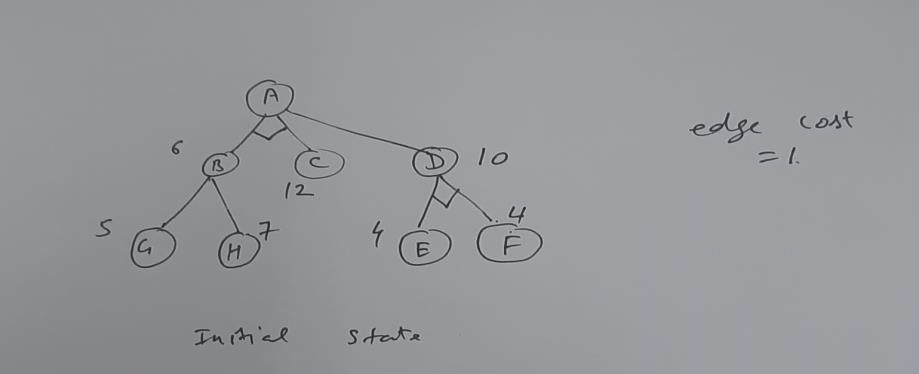

In [ ]:
graph={'A':[['B', 'C'], ['D']],
       'B':[['G'], ['H']],
       'D':[['E','F']]}

node_cost={'B':6, 'C':12, 'D':10, 'E':4, 'F':4, 'G':5, 'H':7}

edge_cost=1

head_node='A'

def solve(currs):
  flag=0
  for curr in currs:
    if curr in graph.keys():
      flag=1

  if not flag:
    return 0

  min_cost=1000000
  for curr in currs:
    if curr in graph.keys():
      for path in graph[curr]:
        cost=0
        for node in path:
          cost=cost + node_cost[node]+edge_cost
          if min_cost>cost:
            min_cost=cost
            next_nodes=path
  print(f"{next_nodes}, {min_cost}")
  return [next_nodes, min_cost]


def driver():
  cost=0
  curr = head_node
  moves=0
  while True:
    for node in curr:
      result=solve(node)
      if not result:
        print(f"moves:{moves}")
        print(f"cost:{cost}")
        return cost
      cost += result[1]
      curr = result[0]
    moves += 1


if __name__=="__main__":
  driver()

['B', 'C'], 7
['G'], 6
moves:1
cost:13
